# 9/4/2023 ***PyTorch Workflow***

In [2]:
print('Hello Pytorch!')

Hello Pytorch!


### We'll use a linear regression formula to make a straight line with known parameters:  
$ y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n $



In [1]:
# Create a known parameters:
weight = 0.7
bias = 0.3

# Create:

start = 0
end = 1
step = 0.02

import torch
import pandas as pd

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]
len(X), len(y)

(50, 50)

## Splitting data *(training and test sets)*

In [2]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
len(X_train), len(y_train)

X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Buiding a $f(x)$ to visualize our data

In [3]:
import matplotlib.pyplot as plt

def plot_predictions(train_data = X_train, 
                    train_labels = y_train,
                    test_data = X_test, 
                    test_labels = y_test,
                    predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(8, 5))
    
    #plot training data in colour blue / test in green
    plt.scatter(train_data, train_labels, c="b", s=4, label= "Training dataset")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    #are there predictions?
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 11})
    

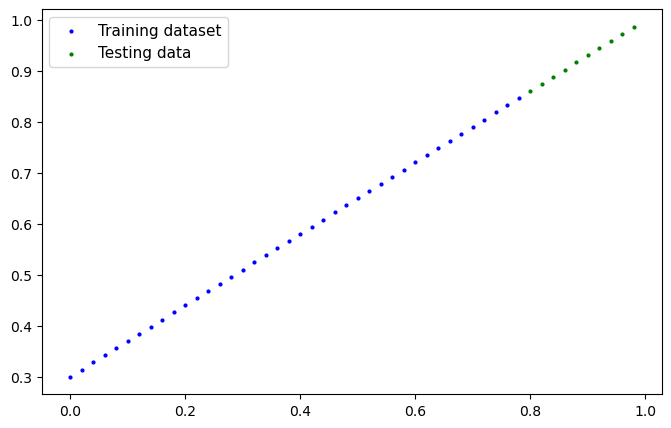

In [4]:
plot_predictions()


## PyTorch Model for Linear Regression  
$\mathbf{y} = \mathbf{\beta_0} + \mathbf{\beta_1} \mathbf{x} + \mathbf{\epsilon}$  

$\mathbf{y}$ es la variable dependiente o respuesta que se trata de predecir.  
$\mathbf{x}$ es la variable independiente o predictor que se utiliza para hacer la predicción.  
$\mathbf{\beta_0}$ es la intersección o el valor de $\mathbf{y}$ cuando $\mathbf{x=0}$.  
$\mathbf{\beta_1}$ es la pendiente o el cambio en $\mathbf{y}$ por unidad de cambio en $\mathbf{x}$.  
$\mathbf{\epsilon}$ es el término de error, que representa la variación en $\mathbf{y}$ que no puede explicarse por la relación lineal entre $\mathbf{x}$ e $\mathbf{y}$.  


In [5]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
        
    # method to define the computation in the model   
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

- `torch.nn`: Contiene todos los bloques de construcción necesarios para crear gráficos computacionales (que esencialmente son una serie de cálculos ejecutados de una manera particular).
- `torch.nn.Parameter`: Almacena tensores que se pueden usar con `nn.Module`. Si `requires_grad=True`, los gradientes (utilizados para actualizar los parámetros del modelo mediante descenso de gradiente) se calculan automáticamente, esto a menudo se conoce como "autograd".
- `torch.nn.Module`: La clase base para todos los módulos de redes neuronales, todos los bloques de construcción para redes neuronales son subclases. Si está construyendo una red neuronal en PyTorch, sus modelos deben ser subclases de `nn.Module`. Se requiere que se implemente un método `forward()`.
- `torch.optim`: Contiene varios algoritmos de optimización (estos indican a los parámetros del modelo almacenados en `nn.Parameter` cómo cambiar mejor para mejorar el descenso de gradiente y, a su vez, reducir la pérdida).
- `def forward()`: Todas las subclases de `nn.Module` requieren un método `forward()`, esto define el cálculo que se realizará en los datos que se pasan al `nn.Module` particular (por ejemplo, la fórmula de regresión lineal mencionada anteriormente).  

Si lo anterior suena complejo, piense en esto: casi todo en una red neuronal PyTorch proviene de **torch.nn**:  
- `nn.Module` contiene los bloques de construcción más grandes (capas).
- `nn.Parameter` contiene los parámetros más pequeños como pesos y sesgos (se combinan para crear `nn.Module(s)`).
- `forward()` le dice a los bloques más grandes cómo realizar cálculos en las entradas (tensores llenos de datos) dentro de `nn.Module(s)`.
- `torch.optim` contiene métodos de optimización sobre cómo mejorar los parámetros dentro de `nn.Parameter` para representar mejor los datos de entrada.

https://pytorch.org/tutorials/beginner/ptcheat.html

![PyTorch Workflow image](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

### Checking the contents of our **PyTorch Model**
Now we've created a model, let's see what's inside...  
We can check our model parameters or whats inside our model using `.parameters()`

In [6]:
# create a random seed:
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_one = LinearRegressionModel()

# check parameters
list(model_one.parameters())

# List named parameters 
model_one.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [7]:
weight, bias

(0.7, 0.3)

## Making predictions using `torch.inference_mode()`  
To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.


In [8]:
# code 1
with torch.inference_mode():
    y_preds = model_one(X_test)    
y_preds

# https://twitter.com/PyTorch/status/1437838231505096708?s=20

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

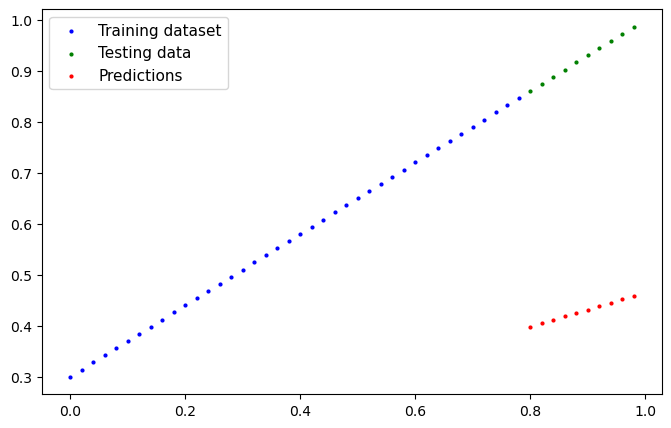

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
# oldest way
with torch.no_grad():
    y_preds = model_one(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## Train a model  
https://www.learnpytorch.io/01_pytorch_workflow/#3-train-model 
* One way to measure how poor or how wrong your model predictions are is to use a *loss functions* **Lower is better**   https://pytorch.org/docs/stable/nn.html#loss-functions

- Note: May also be called costn or criterion in different areas.

#### Things we need to train:
1. **Loss fn**: A function to measure how poor or how wrong your model predictions are is to use a loss functions Lower is better. https://pytorch.org/docs/stable/nn.html#loss-functions
2. **Optimizer**: Takes into account the loss of a model and adjusts the models parameters (weight, bias). To improve the loss fn https://pytorch.org/docs/stable/optim.html

And specially for **PyTorch**, we need:
* A training loop
* A testing loop

In [11]:
list(model_one.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_one.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Creating an optimization loop in PyTorch
https://www.learnpytorch.io/01_pytorch_workflow/#creating-an-optimization-loop-in-pytorch

In [13]:
# check out our models paramaters (a parameters is a value that the modedl sets itself)
model_one.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# setup a loss fn:
loss_fn = nn.L1Loss()

# setup an optimizer (SGD) 
optimizer = torch.optim.SGD(params = model_one.parameters(),
                           lr = 0.01) # Lr = Learning rate (suuuuper important concept)

In [19]:
arr = [1,2,3,4,5,6,7,8,9,10]
arr


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
arr.append(11)
arr[::-1]

[11, 11, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [30]:
for n in range(len(arr)):
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [31]:
fruits = ['manzana', 'banana', 'cereza', 'dátil', 'naranja']

# Crear una lista con frutas que contengan la letra 'a'
fruits_with_a = [fruit for fruit in fruits if 'a' in fruit]

print(fruits_with_a) # ['manzana', 'banana', 'naranja']


['manzana', 'banana', 'cereza', 'naranja']
